In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Load data
df = pd.read_csv("NVDA.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Create target and features (use close price shifts for binary direction prediction)
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)

# Select features and target
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y = df['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [31]:
# Display a sample of the data for slide 3
print(nvda_data.head())  # Adjust the sample size as needed

        Date      Open      High       Low     Close  Adj Close      Volume
0 1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000
1 1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000
2 1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000
3 1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000
4 1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000


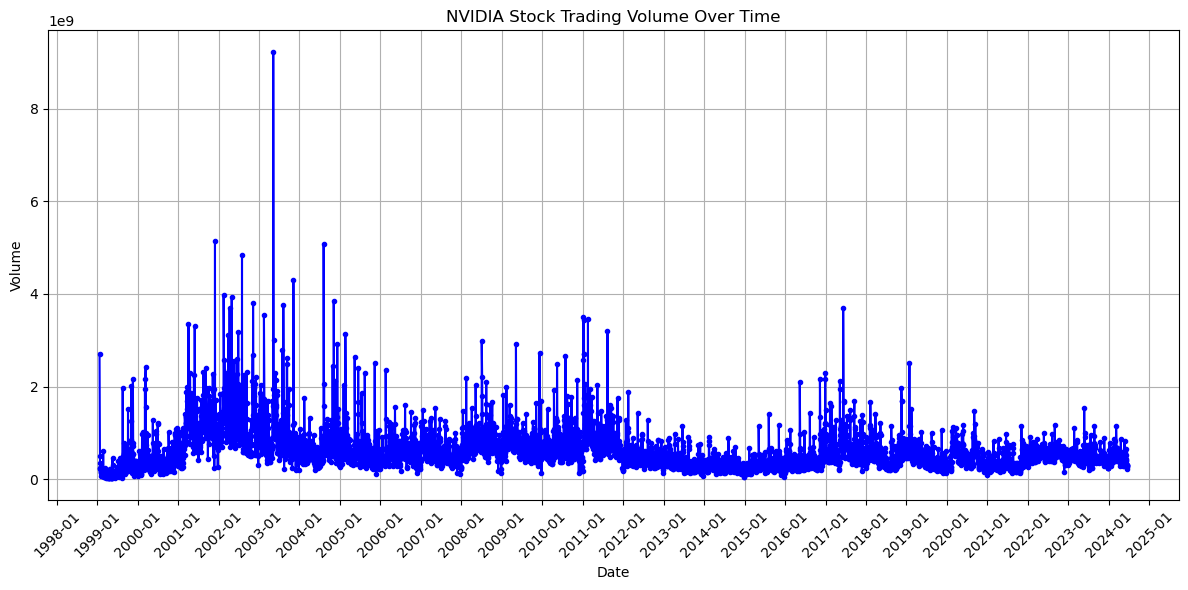

In [32]:
# Convert Date to datetime format and sort by date
nvda_data['Date'] = pd.to_datetime(nvda_data['Date'])
nvda_data = nvda_data.sort_values(by='Date')

# Plotting the Volume Trend for slide 4
plt.figure(figsize=(12, 6))
plt.plot(nvda_data['Date'], nvda_data['Volume'], color='blue', marker='o', markersize=3)
plt.title("NVIDIA Stock Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

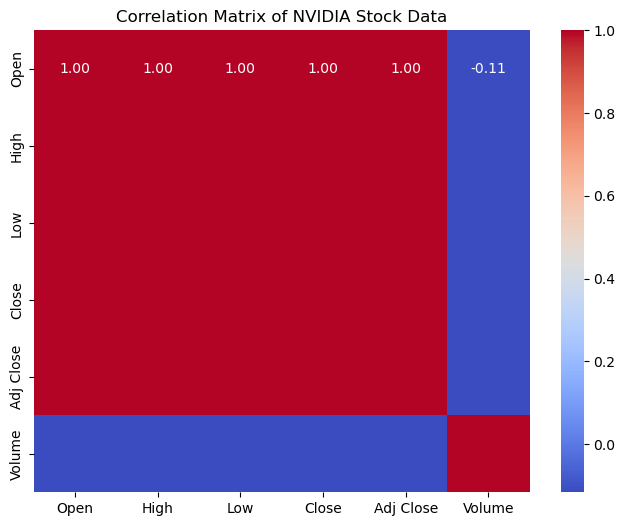

In [33]:
# Calculate correlation matrix 
correlation = nvda_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plotting the correlation matrix for slide 4
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of NVIDIA Stock Data")
plt.show()

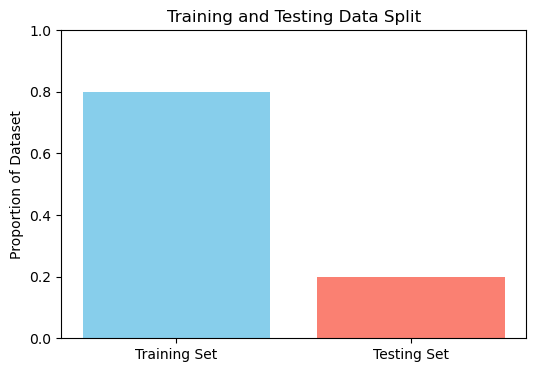

In [34]:
# Example visualization to represent the data split for slide 7
data_split = {'Training Set': 0.8, 'Testing Set': 0.2}
names = list(data_split.keys())
values = list(data_split.values())

plt.figure(figsize=(6, 4))
plt.bar(names, values, color=['skyblue', 'salmon'])
plt.title("Training and Testing Data Split")
plt.ylabel("Proportion of Dataset")
plt.ylim(0, 1)
plt.show()

In [35]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Get metrics
log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)
log_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

In [36]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Get metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

Epoch 1/10


C:\Users\hunte\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\hunte\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\sequence.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in rows])


119/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4897 - loss: 0.6933

C:\Users\hunte\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4924 - loss: 0.6933
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5056 - loss: 0.6930
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4895 - loss: 0.6937
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5151 - loss: 0.6928
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5003 - loss: 0.6931
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4977 - loss: 0.6934
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5141 - loss: 0.6929
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5154 - loss: 0.6928
Epoch 9/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5128 - loss: 0.6930
Epoch 10/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5113 - loss: 0.6929
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-A

C:\Users\hunte\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\sequence.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in rows])


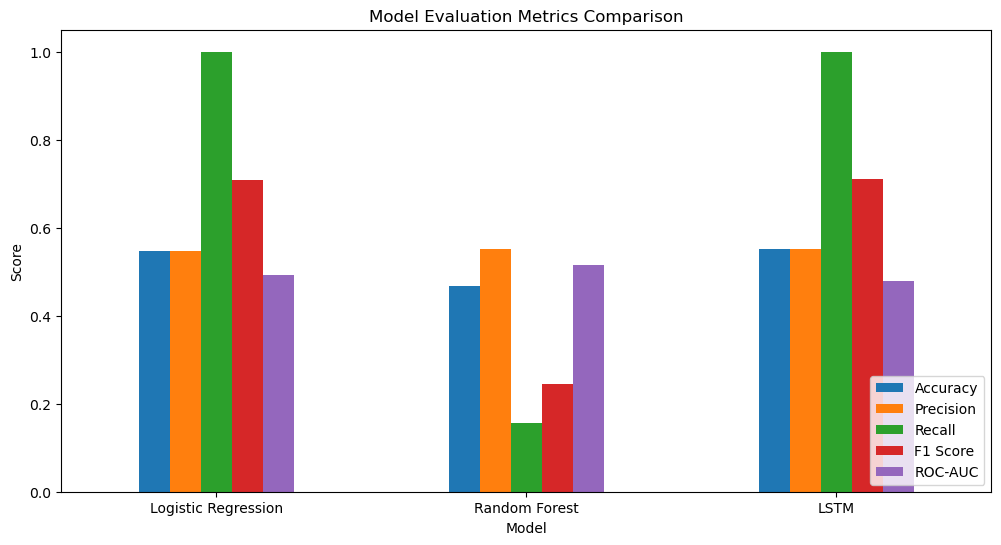

In [40]:
# Create target and features
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)  # Remove rows with NaN after shift operation

# Select features and target
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y = df['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale data for LSTM compatibility
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 1. Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Calculate metrics for Logistic Regression
log_accuracy = accuracy_score(y_test, y_pred_log)
log_precision = precision_score(y_test, y_pred_log)
log_recall = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)
log_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

# 2. Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# 3. LSTM Model

# Define input parameters for TimeseriesGenerator
n_input = 10  # Use 10 days for each sequence
n_features = X.shape[1]

# Generate time series data for LSTM
generator = TimeseriesGenerator(X_scaled[:int(0.8 * len(X_scaled))], y[:int(0.8 * len(y))], length=n_input, batch_size=32)

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_input, n_features)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(generator, epochs=10, verbose=1)

# Prepare test data for LSTM
X_test_scaled = X_scaled[int(0.8 * len(X_scaled)):]
y_test_lstm = y[int(0.8 * len(y)):]

test_generator = TimeseriesGenerator(X_test_scaled, y_test_lstm, length=n_input, batch_size=32)

# Predict with LSTM
y_pred_lstm = (model.predict(test_generator) > 0.5).astype(int)  # Binarize predictions

# Calculate metrics for LSTM
lstm_accuracy = accuracy_score(y_test_lstm[n_input:], y_pred_lstm)
lstm_precision = precision_score(y_test_lstm[n_input:], y_pred_lstm)
lstm_recall = recall_score(y_test_lstm[n_input:], y_pred_lstm)
lstm_f1 = f1_score(y_test_lstm[n_input:], y_pred_lstm)
lstm_roc_auc = roc_auc_score(y_test_lstm[n_input:], model.predict(test_generator))

# 4. Display metrics in a DataFrame
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'LSTM'],
    'Accuracy': [log_accuracy, rf_accuracy, lstm_accuracy],
    'Precision': [log_precision, rf_precision, lstm_precision],
    'Recall': [log_recall, rf_recall, lstm_recall],
    'F1 Score': [log_f1, rf_f1, lstm_f1],
    'ROC-AUC': [log_roc_auc, rf_roc_auc, lstm_roc_auc]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Plot metrics for comparison
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 6), rot=0)
plt.title("Model Evaluation Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.show()

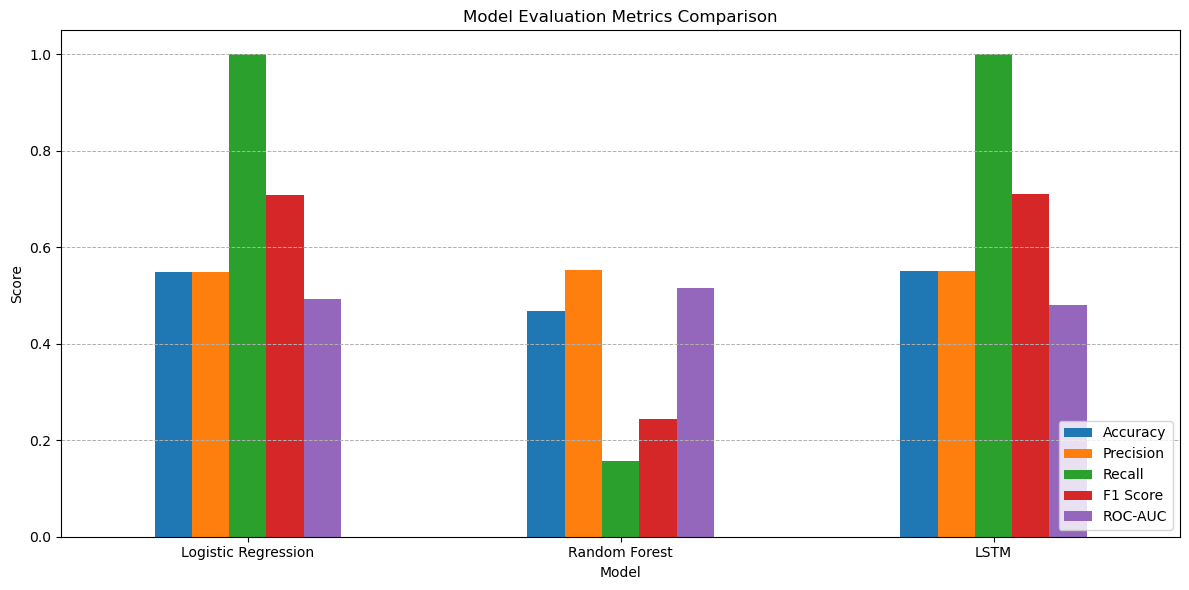

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Data with calculated metrics for each model
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'LSTM'],
    'Accuracy': [0.548084, 0.468335, 0.551615],
    'Precision': [0.548084, 0.552764, 0.551615],
    'Recall': [1.000000, 0.156919, 1.000000],
    'F1 Score': [0.708081, 0.244444, 0.711021],
    'ROC-AUC': [0.493561, 0.516316, 0.479987]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Set 'Model' as the index for easy plotting
metrics_df.set_index('Model', inplace=True)

# Plot the metrics for each model
metrics_df.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title("Model Evaluation Metrics Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show() #8

Epoch 1/10
 80/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5321 - loss: 0.6921

C:\Users\hunte\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\sequence.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in rows])


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5221 - loss: 0.6925 - val_accuracy: 0.5516 - val_loss: 0.6898
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4980 - loss: 0.6931 - val_accuracy: 0.5516 - val_loss: 0.6896
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4918 - loss: 0.6934 - val_accuracy: 0.5516 - val_loss: 0.6896
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5230 - loss: 0.6926 - val_accuracy: 0.5516 - val_loss: 0.6896
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5033 - loss: 0.6930 - val_accuracy: 0.5516 - val_loss: 0.6894
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5039 - loss: 0.6933 - val_accuracy: 0.5516 - val_loss: 0.6894
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5186 - loss: 0.6927 - val_accuracy: 0.5516 - val_loss: 0.6894
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5113 - loss: 0.6927 - val_accuracy: 0.5516 - val_

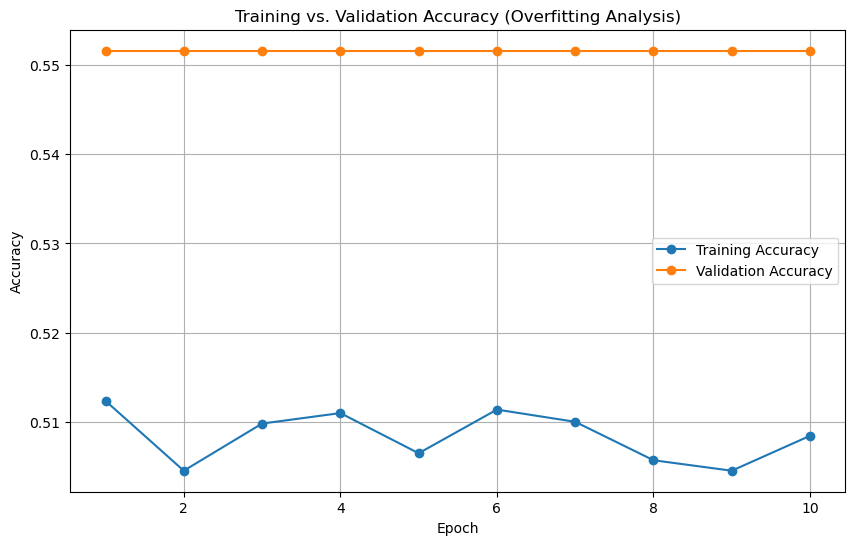

In [42]:
# Assuming you have already set up and compiled your LSTM model

# Train the LSTM model and store training history
history = model.fit(generator, epochs=10, validation_data=test_generator, verbose=1)

# Extract training and validation accuracy
train_acc = history.history['accuracy']         # Training accuracy per epoch
val_acc = history.history['val_accuracy']       # Validation accuracy per epoch

# Plot training vs. validation accuracy
import matplotlib.pyplot as plt

epochs = range(1, len(train_acc) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, marker='o', label='Training Accuracy')
plt.plot(epochs, val_acc, marker='o', label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy (Overfitting Analysis)")
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Generate predictions with the trained LSTM model
y_pred_lstm = (model.predict(test_generator) > 0.5).astype(int)  # Binarize predictions

# Convert test labels to the correct shape if needed (remove initial n_input entries)
y_test_adjusted = y_test_lstm[n_input:]

# Calculate metrics using predictions and adjusted test labels
lstm_accuracy = accuracy_score(y_test_adjusted, y_pred_lstm)
lstm_precision = precision_score(y_test_adjusted, y_pred_lstm)
lstm_recall = recall_score(y_test_adjusted, y_pred_lstm)
lstm_f1 = f1_score(y_test_adjusted, y_pred_lstm)
lstm_roc_auc = roc_auc_score(y_test_adjusted, model.predict(test_generator))

# Display the calculated metrics
print("LSTM Model Metrics:")
print(f"Accuracy: {lstm_accuracy}")
print(f"Precision: {lstm_precision}")
print(f"Recall: {lstm_recall}")
print(f"F1 Score: {lstm_f1}")
print(f"ROC-AUC: {lstm_roc_auc}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
LSTM Model Metrics:
Accuracy: 0.5516154452324665
Precision: 0.5516154452324665
Recall: 1.0
F1 Score: 0.7110208227526664
ROC-AUC: 0.48026110971629427


C:\Users\hunte\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\sequence.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in rows])


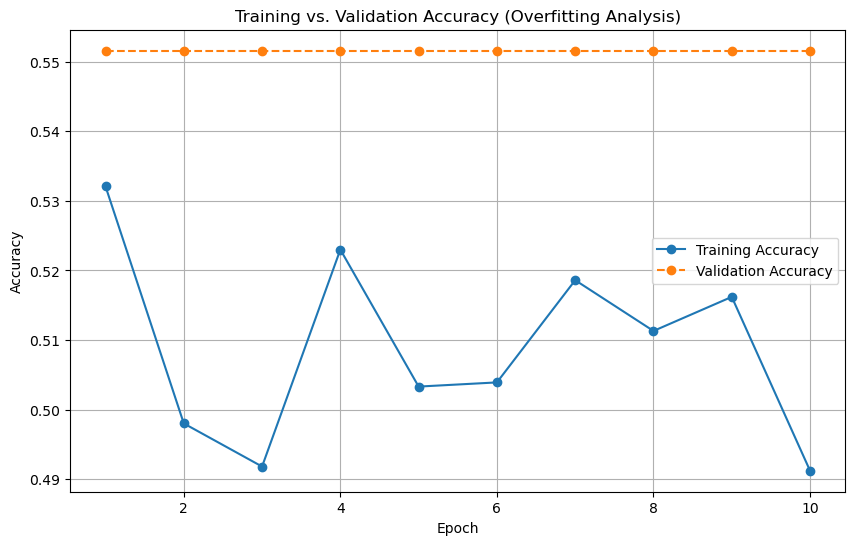

In [44]:
import matplotlib.pyplot as plt

# Use the recorded accuracy values for each epoch
epochs = list(range(1, 11))
train_acc = [0.5321, 0.4980, 0.4918, 0.5230, 0.5033, 0.5039, 0.5186, 0.5113, 0.5162, 0.4912]
val_acc = [0.5516] * 10  # Validation accuracy was constant in this case

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, marker='o', label='Training Accuracy')
plt.plot(epochs, val_acc, marker='o', label='Validation Accuracy', linestyle='--')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy (Overfitting Analysis)")
plt.legend()
plt.grid(True)
plt.show()
#11

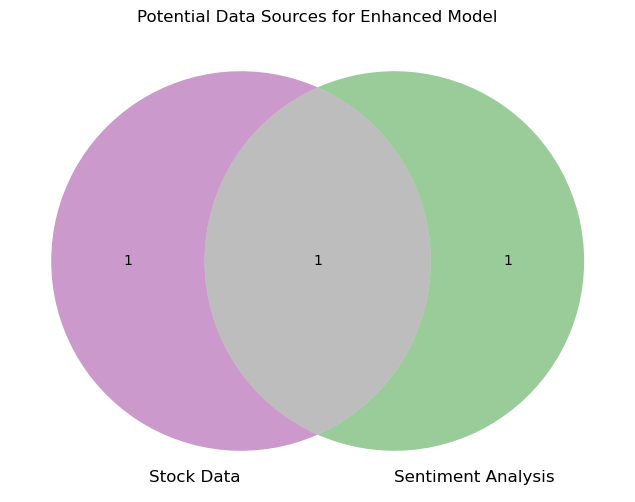

In [48]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Conceptual Venn diagram for data sources
plt.figure(figsize=(8, 6))
venn2(subsets=(1, 1, 1), set_labels=('Stock Data', 'Sentiment Analysis'), set_colors=('purple', 'green'))
plt.title("Potential Data Sources for Enhanced Model")
plt.show()
#12

In [47]:
pip install matplotlib-venn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.1-py3-none-any.whl size=45338 sha256=a28725772a0c4ad39652b0e9c84d077fa9b87bb8a111f2c2e2421340778d1fcf
  Stored in directory: c:\users\hunte\appdata\local\pip\cache\wheels\08\28\f0\0a3240d632a27df6da04d2888a6b058c37e1cbbb425ec5d2cc
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.
